## Decision Tree Exercise 1
The goal of this exercise is to build a decision tree regressor model that can accurately estimate the TOC content based on the given features.


The columns in this dataset can be defined as follows:

- Thickness_ft: The thickness of a geological layer measured in feet.

- Bulk Density_gg per cc: The bulk density of the geological layer measured in grams per cubic centimeter (cc).

- Resistivity_ohmsm: The resistivity of the geological layer measured in ohm-meters (ohmsm).

- Effective Porosity_Fraction: The effective porosity of the geological layer represented as a fraction.

- Clay Volume_Fraction: The volume fraction of clay minerals in the geological layer.

- Water Saturation_Fraction: The water saturation of the geological layer represented as a fraction.

- TOC_Fraction: The total organic carbon content of the geological layer represented as a fraction.


In [229]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline



# Suppressing warnings
import warnings 
warnings.filterwarnings('ignore')

In [238]:
#Reading the dataset
df = pd.read_csv('TOC_prediction.csv')

In [4]:
#Displaying the first few rows of the dataset
df.head()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
0,219.713745,2.415151,3.151841,0.066973,0.228949,0.466486,0.057828
1,160.308606,2.430899,3.160330,0.034790,0.297078,0.544329,0.051316
2,149.944934,2.424665,4.087933,0.062167,0.311720,0.426713,0.055788
3,209.811890,2.394232,2.889251,0.087480,0.227958,0.479112,0.057745
4,167.492163,2.420244,2.881886,0.057664,0.302924,0.523564,0.052154


In [239]:
#Checking the shape of the dataset
df.shape

(987, 8)

In [6]:
#Obtaining information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Thickness_ft                 987 non-null    float64
 1   Bulk Density_gg per cc       987 non-null    float64
 2   Resistivity_ohmsm            987 non-null    float64
 3   Effective Porosity_Fraction  987 non-null    float64
 4   Clay Volume_ Fraction        987 non-null    float64
 5   Water Saturation_Fraction    987 non-null    float64
 6   TOC_Fraction                 987 non-null    float64
dtypes: float64(7)
memory usage: 54.1 KB


In [240]:
# Getting descriptive statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,987.0,493.000000,285.066659,0.000000,246.500000,493.000000,739.500000,986.000000
Thickness_ft,987.0,150.448933,52.452284,50.218753,123.462354,141.662622,166.707110,475.992627
Bulk Density_gg per cc,987.0,2.423001,0.019059,2.386117,2.409469,2.422639,2.433418,2.540608
Resistivity_ohmsm,987.0,3.892432,1.342193,1.680451,3.120852,3.650354,4.319585,15.970625
Effective Porosity_Fraction,987.0,0.061492,0.014805,0.017432,0.051250,0.061158,0.072289,0.096054
Clay Volume_ Fraction,987.0,0.271257,0.045289,0.153118,0.238607,0.264785,0.303776,0.413083
Water Saturation_Fraction,987.0,0.435876,0.080023,0.230041,0.372234,0.442414,0.490972,0.683304
TOC_Fraction,987.0,0.052630,0.005062,0.030830,0.051026,0.053662,0.056100,0.060907


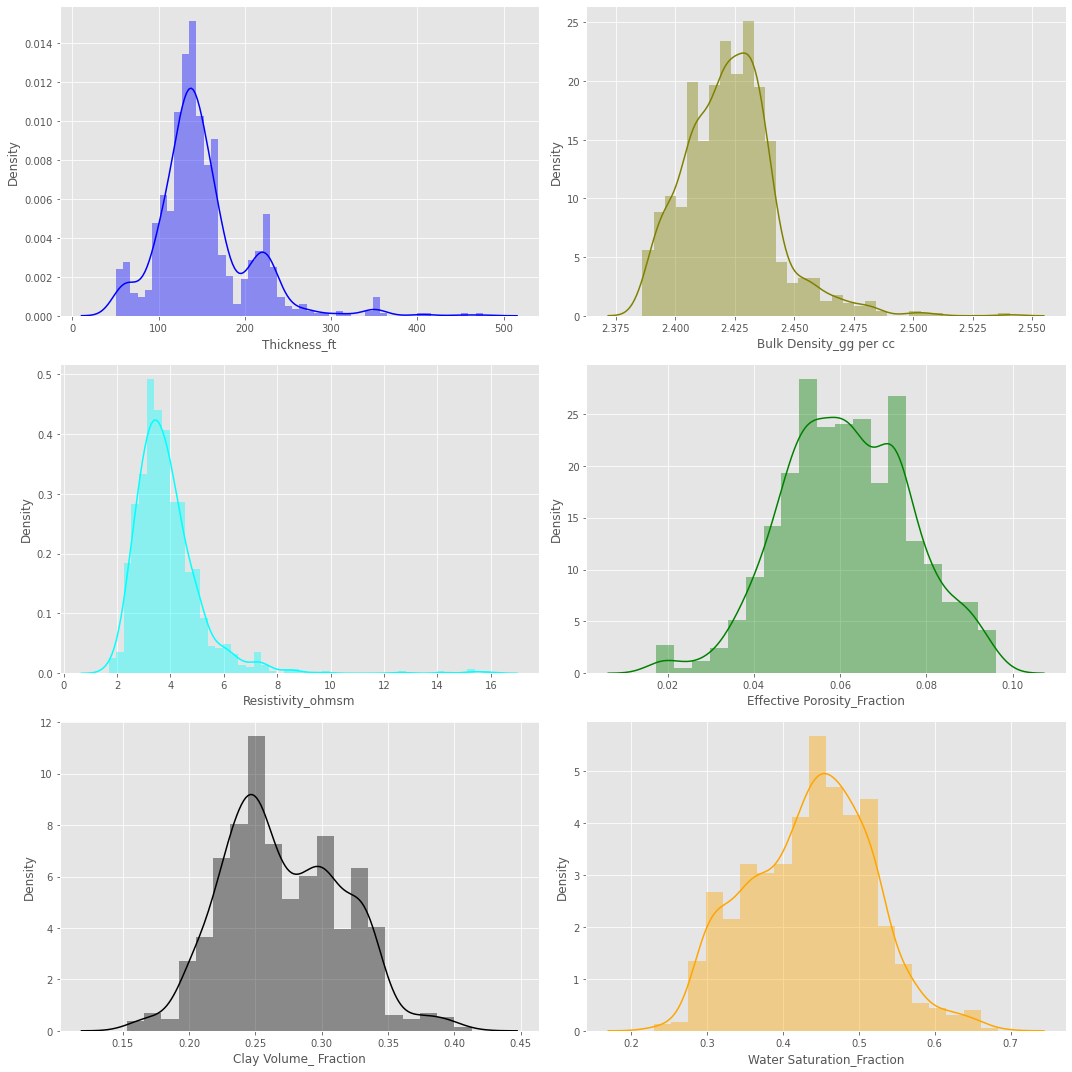

In [19]:
# Visualizing the distributions of the features
plt.style.use('ggplot')
fig,ax =plt.subplots(3,2,figsize=(15,15))
sns.distplot(df['Thickness_ft'],ax=ax[0,0],color='blue')
sns.distplot(df['Bulk Density_gg per cc'], ax=ax[0,1],color='olive')
sns.distplot(df['Resistivity_ohmsm'],ax=ax[1,0],color='cyan')
sns.distplot(df['Effective Porosity_Fraction'],ax=ax[1,1], color='green')
sns.distplot(df['Clay Volume_ Fraction'],ax=ax[2,0],color='black')
sns.distplot(df['Water Saturation_Fraction'],ax=ax[2,1],color='orange')

plt.tight_layout()
plt.show()

<AxesSubplot: >

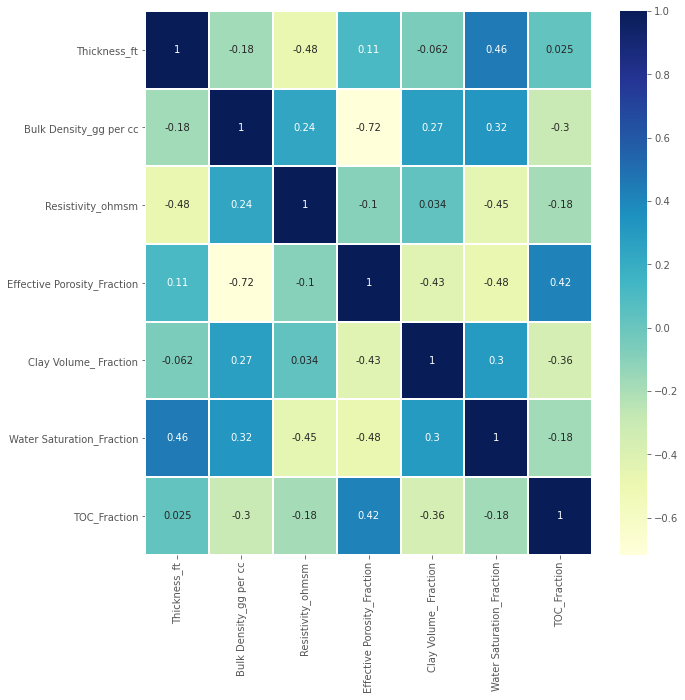

In [25]:
# Visualizing the correlation matrix
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),linewidths=2,cmap='YlGnBu',annot= True)

In [147]:
# Splitting the dataset into features (X) and target variable (Y)
X =df.drop(['TOC_Fraction'],axis=1)
Y= df['TOC_Fraction']

In [148]:
# Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [219]:
# Creating and training the decision tree regressor model
Tree = DecisionTreeRegressor(criterion='mse',max_depth=None, min_samples_split=4, min_samples_leaf=3,ccp_alpha=0)
Tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0, min_samples_leaf=3, min_samples_split=4)

In [244]:
#checking for model accuracy on training data
Tree.score(x_train,y_train)

0.9425508399722998

In [245]:
# Making predictions on the test set
prediction= Tree.predict(x_test)

In [246]:
#Evaluating the model
print(f"mean squared error:{mean_squared_error(y_test,prediction)}, mean absolute error:{mean_absolute_error(y_test,prediction)}, r squared value:{r2_score(y_test,prediction)}")

mean squared error:6.240190704080745e-06, mean absolute error:0.0011837543653198655, r squared value:0.7670169221814498
